<a href="https://colab.research.google.com/github/arovelli/MLPNS_ARovelli/blob/main/StellarPopClusterLab_ARovelli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import preprocessing
import scipy as sp
from scipy import spatial
import numpy as np
from sklearn import cluster

In [2]:
cmag = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS_FBianco/" 
                   "main/clustering/colormag_NGC2808.csv", header=None)
cmag

,0,1
0,-0.286449,19.920797
1,-0.273440,20.197264
2,-0.270112,19.915151
3,-0.243489,20.285819
4,-0.213538,19.689023
...,...,...
596,1.540265,17.014947
597,1.540265,18.009830
598,1.540265,19.012137
599,1.540265,20.007020


In [3]:
cmag.describe()

,0,1
count,601.000000,601.000000
mean,0.657683,18.751932
std,0.410194,1.320065
min,-0.286449,15.017758
25%,0.485623,17.930904
50%,0.753550,18.925512
75%,0.911292,19.911214
max,1.540265,21.016941


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 500x500 with 0 Axes>

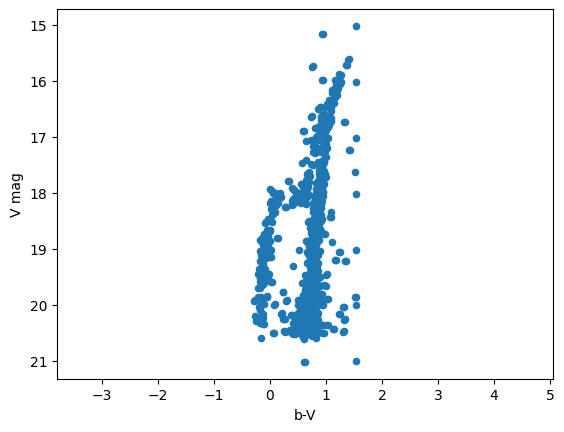

In [7]:
pl.figure(figsize=(5,5))
ax = cmag.plot(x = 0, y = 1, kind = 'scatter')
ax.set_xlabel('b-V')
ax.set_ylabel('V mag')
ax.axis('equal') #setta gli assi sulla stessa scala
pl.gca().invert_yaxis();

In [8]:
preprocessing.scale(cmag, axis=0).mean(axis = 0)

array([-9.45813958e-17, -1.84433722e-15])

In [9]:
cmag_scaled = preprocessing.scale(cmag, axis = 0)

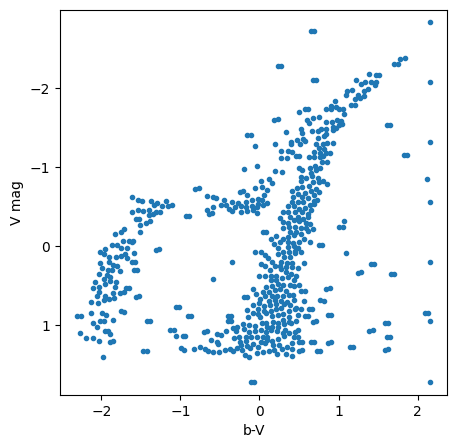

In [10]:
ax = pl.figure(figsize = (5,5)).add_subplot(111)
ax.plot(cmag_scaled[:,0], cmag_scaled[:,1], '.')
ax.set_xlabel('b-V')
ax.set_ylabel('V mag')
ax.axis('equal') #setta gli assi sulla stessa scala
pl.gca().invert_yaxis();


In [11]:
cluster.KMeans?

In [15]:
model = cluster.KMeans(n_clusters=3, random_state=302)

In [16]:
model.fit(cmag_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=302)

In [17]:
model.labels_.shape

(601,)

In [18]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [20]:
model.cluster_centers_

array([[ 0.2930383 ,  0.77187379],
       [ 0.62251398, -1.09094667],
       [-1.61167123,  0.31291912]])

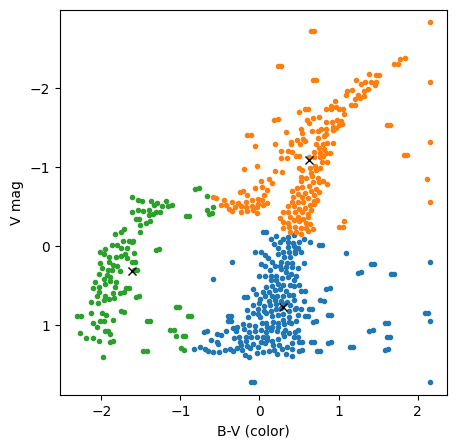

In [27]:
ax = pl.figure(figsize = (5,5)).add_subplot(111)
for i in range(3):
  ax.plot(cmag_scaled[model.labels_ == i, 0], cmag_scaled[model.labels_ == i, 1], '.')
  ax.plot(model.cluster_centers_[i,0], model.cluster_centers_[i,1], 'kx')
  ax.set_xlabel('B-V (color)')
  ax.set_ylabel('V mag')
  ax.axis('equal')
  pl.gca().invert_yaxis();

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 0, 'n clusters')

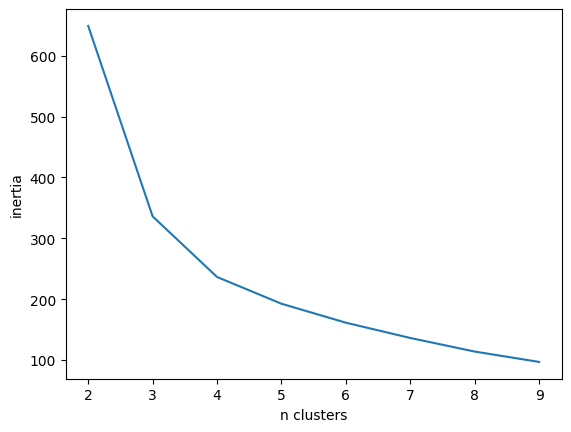

In [31]:
inertias = []
for nc in range(2,10):
  model = cluster.KMeans(n_clusters=nc, random_state=302).fit(cmag_scaled)
  inertias.append(model.inertia_)
pl.plot(range(2,10), inertias);
pl.ylabel("inertia")
pl.xlabel('n clusters')

In [33]:
modeldbs = cluster.DBSCAN(eps = 0.1).fit(cmag_scaled)

In [34]:
modeldbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

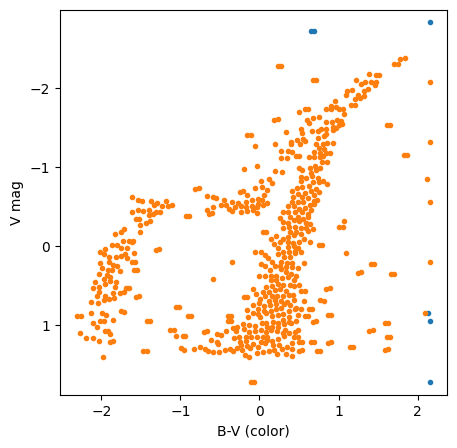

In [39]:
ax = pl.figure(figsize = (5,5)).add_subplot(111)
for i in np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_ == i, 0], cmag_scaled[modeldbs.labels_ == i, 1], '.')
  ax.set_xlabel('B-V (color)')
  ax.set_ylabel('V mag')
  ax.axis('equal')
pl.gca().invert_yaxis();

In [44]:
for e in np.arange(0.001, 1, 0.001):
  modeldbs = cluster.DBSCAN(eps = e, min_samples = 10).fit(cmag_scaled)
  if modeldbs.labels_.max() > 0:
    print(e, modeldbs.labels_.max()) #hyperparameters grid search

0.109 1
0.11 1
0.111 1
0.112 2
0.113 3
0.114 3
0.115 3
0.116 6
0.117 8
0.11800000000000001 10
0.11900000000000001 11
0.12000000000000001 12
0.121 12
0.122 12
0.123 13
0.124 13
0.125 9
0.126 6
0.127 6
0.128 7
0.129 7
0.13 6
0.131 6
0.132 5
0.133 5
0.134 5
0.135 5
0.136 5
0.137 5
0.138 4
0.139 3
0.14 3
0.14100000000000001 3
0.14200000000000002 4
0.14300000000000002 4
0.14400000000000002 4
0.14500000000000002 4
0.146 5
0.147 6
0.148 6
0.149 6
0.15 6
0.151 6
0.152 5
0.153 6
0.154 6
0.155 6
0.156 6
0.157 6
0.158 6
0.159 7
0.16 7
0.161 7
0.162 7
0.163 7
0.164 7
0.165 7
0.166 7
0.167 7
0.168 7
0.169 6
0.17 6
0.171 6
0.17200000000000001 6
0.17300000000000001 6
0.17400000000000002 5
0.17500000000000002 5
0.17600000000000002 5
0.177 5
0.178 5
0.179 4
0.18 4
0.181 4
0.182 4
0.183 4
0.184 4
0.185 3
0.186 3
0.187 3
0.188 3
0.189 3
0.19 3
0.191 3
0.192 3
0.193 3
0.194 3
0.195 3
0.196 3
0.197 3
0.198 2
0.199 2
0.2 2
0.201 2
0.202 2
0.203 2
0.20400000000000001 2
0.20500000000000002 2
0.206000000000000

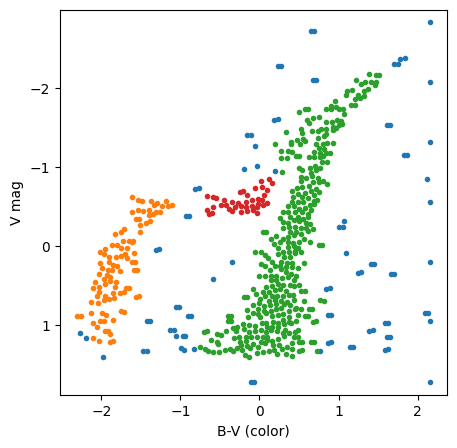

In [46]:
ax = pl.figure(figsize = (5,5)).add_subplot(111)
modeldbs = cluster.DBSCAN(eps=0.2, min_samples = 10).fit(cmag_scaled)
for i in np.unique(modeldbs.labels_):
  ax.plot(cmag_scaled[modeldbs.labels_==i, 0], cmag_scaled[modeldbs.labels_==i, 1], '.')
ax.set_xlabel('B-V (color)')
ax.set_ylabel('V mag')
ax.axis('equal')
pl.gca().invert_yaxis()